# Load & Understand the Dataset
Before cleaning, always load and inspect.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('GoodReads_100k_books.csv')

In [3]:
df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [4]:
# Basic info
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   isbn          85518 non-null   object 
 6   isbn13        88565 non-null   object 
 7   link          100000 non-null  object 
 8   pages         100000 non-null  int64  
 9   rating        100000 non-null  float64
 10  reviews       100000 non-null  int64  
 11  title         99999 non-null   object 
 12  totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB
None
author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link     

> Check if there are any duplicate rows and remove them.

In [5]:
df.drop_duplicates(inplace=True)

### Handle Columns with Missing Values
> We’ll go column by column based on importance and usability in a recommender system.

> Only 1 missing in `title`, and 0 in `author` → drop that one row.

In [6]:
df = df[df['title'].notnull()]

> Strategy: Fill with placeholder (if missing, we can say "No description available").

In [7]:
df['desc'].fillna("No description available", inplace=True)

 > Strategy: Fill with `"Unknown"` or `"Misc"` (you can choose).

In [8]:
df['genre'].fillna("Unknown", inplace=True)

 > Strategy: Fill with `"Not specified".`

In [9]:
df['bookformat'].fillna("Not specified", inplace=True)

> Strategy: Drop if not using images, or fill with a placeholder link if needed.

In [10]:
df['img'].fillna("https://via.placeholder.com/150", inplace=True)


 - `isbn`, `isbn13` — Unique identifiers, not needed for content-based
- A lot of missing data, but usually not necessary for modeling
- Strategy: Keep as is or drop entirely

In [11]:
# Optional
df.drop(['isbn', 'isbn13'], axis=1, inplace=True)


> Ensure we’ve handled all missing values.

In [12]:
print(df.isnull().sum())


author          0
bookformat      0
desc            0
genre           0
img             0
link            0
pages           0
rating          0
reviews         0
title           0
totalratings    0
dtype: int64


# EDA with Data Visualization
> We’ll go step by step through the most important insights with visualizations using `matplotlib`, `seaborn`, and `wordcloud`.

> Get a quick overview of numerical columns:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of numerical columns
print(df.describe())

              pages        rating        reviews  totalratings
count  99999.000000  99999.000000   99999.000000  9.999900e+04
mean     255.012790      3.833060     181.530235  2.990794e+03
std      367.914538      0.621239    1449.458366  3.635356e+04
min        0.000000      0.000000       0.000000  0.000000e+00
25%      135.000000      3.660000       3.000000  3.100000e+01
50%      240.000000      3.910000      15.000000  1.460000e+02
75%      336.000000      4.140000      67.000000  7.440000e+02
max    70000.000000      5.000000  158776.000000  3.819326e+06


>### *Distribution of Book Ratings*

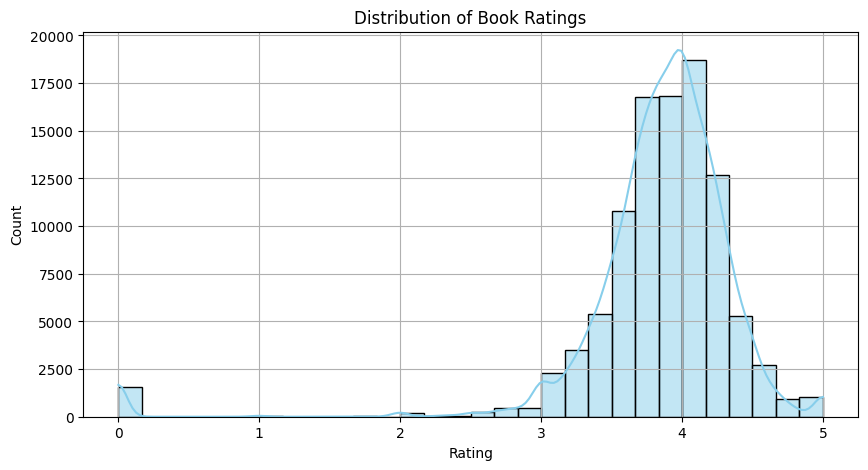

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Note: Most ratings will likely cluster between 3.0 and 5.0, with a right skew.

>### *Most Common Book Genres*

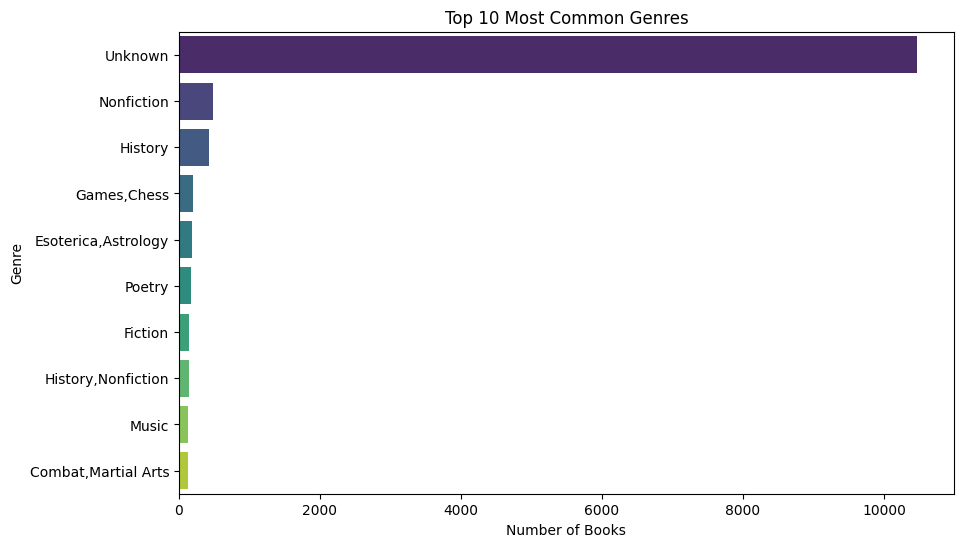

In [15]:
# Count most frequent genres
top_genres = df['genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()

Note : Helps us see which genres dominate—important for genre-based recommendations.

>### *Most Prolific Authors*

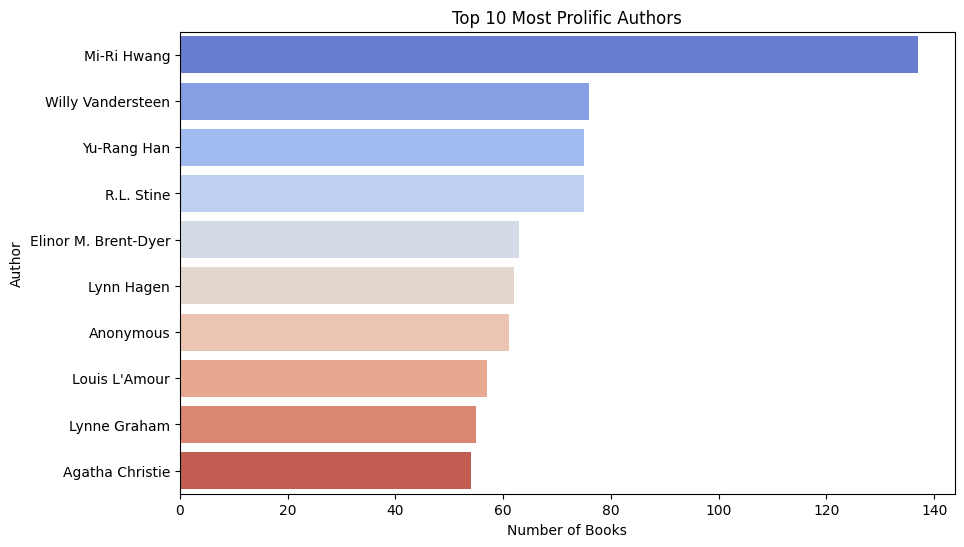

In [16]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='coolwarm')
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

>### *Pages vs Ratings Scatterplot*

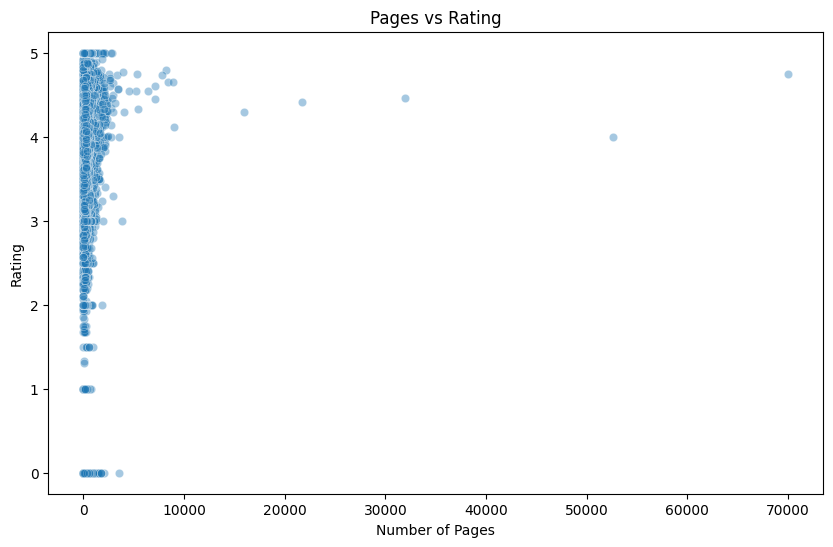

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pages', y='rating', alpha=0.4)
plt.title('Pages vs Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Rating')
plt.show()

> ### *Correlation Heatmap*
This will help detect relationships among numerical features:

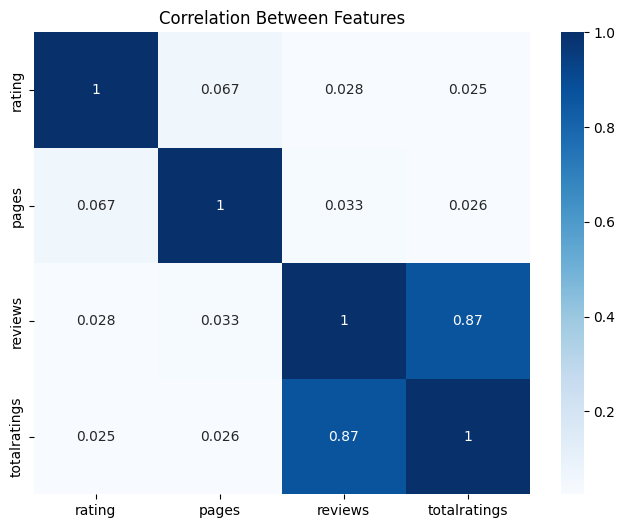

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['rating', 'pages', 'reviews', 'totalratings']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

>### *Top Rated Books*

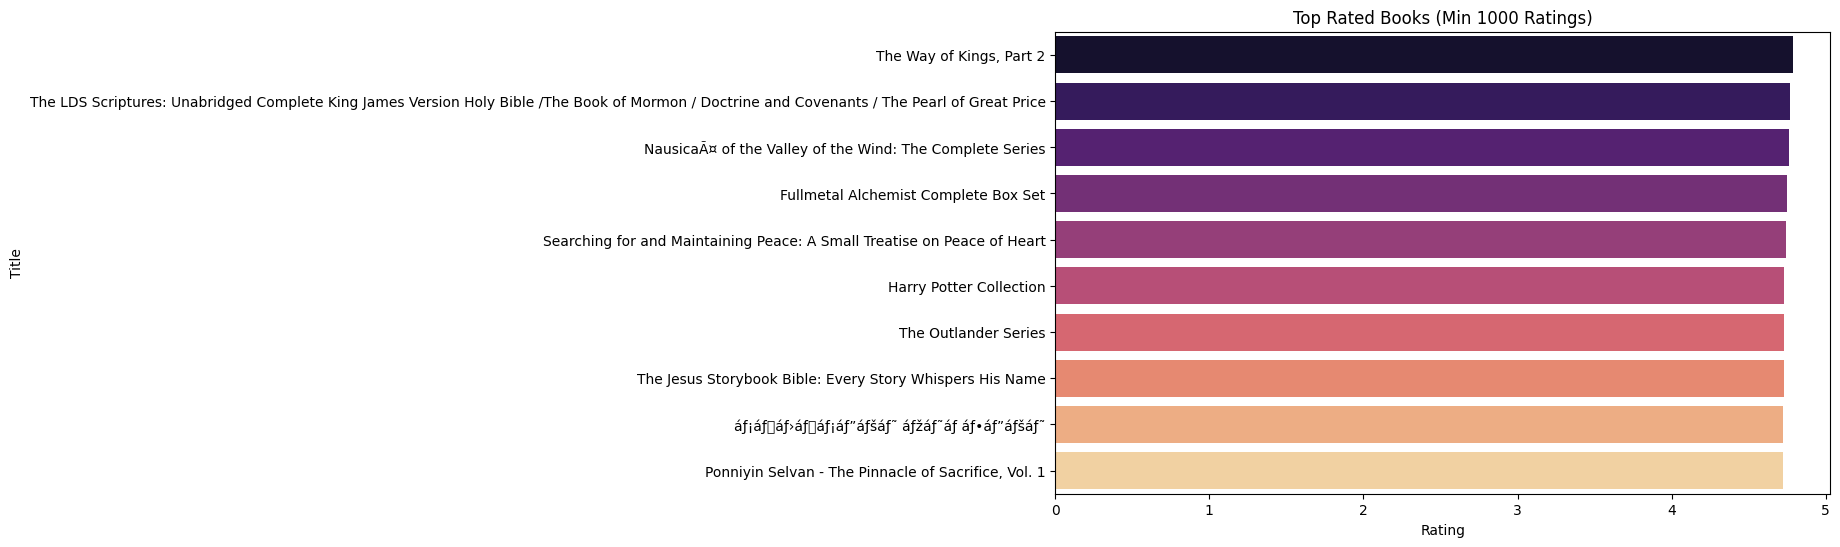

In [19]:
top_rated = df[df['totalratings'] > 1000].sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rated['rating'], y=top_rated['title'], palette='magma')
plt.title('Top Rated Books (Min 1000 Ratings)')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()

# Popularity-Based Recommender System (Top 100 Books)

> #### Filter & Sort Books by Popularity
We define popularity by number of reviews, and to ensure high quality, we can also filter with a minimum rating (optional).

In [20]:
# Filter columns
popularity_df = df[['title','author', 'img', 'reviews', 'rating']]

# Drop duplicates if any (some titles might repeat)
popularity_df = popularity_df.drop_duplicates(subset='title')

# Sort by number of reviews and then rating
top_100_books = popularity_df.sort_values(by=['reviews', 'rating'], ascending=False).head(100)

> #### Check the Top 5 Popular Books

In [21]:
top_100_books.head()

,title,author,img,reviews,rating
27180,The Fault in Our Stars,John Green,https://i.gr-assets.com/images/S/compressed.ph...,158776,4.19
49695,Divergent,Veronica Roth,https://i.gr-assets.com/images/S/compressed.ph...,110042,4.18
12325,Fifty Shades of Grey,E.L. James,https://i.gr-assets.com/images/S/compressed.ph...,79264,3.66
57742,Harry Potter and the Deathly Hallows,J.K. Rowling,https://i.gr-assets.com/images/S/compressed.ph...,68974,4.62
76329,Eleanor & Park,Rainbow Rowell,https://i.gr-assets.com/images/S/compressed.ph...,68679,4.03


> #### Optional – Reset Index and Rename Columns for Display

In [22]:
top_100_books.reset_index(drop=True, inplace=True)
top_100_books.columns = ['Title','Author', 'Image_URL', 'Number_of_Reviews', 'Average_Rating']

> #### (Optional) Display as a Table with Images (Jupyter Notebook)

If you're using Jupyter Notebook and want to see images inline:

In [23]:
from IPython.core.display import HTML

def render_book(row):
    return f'''
    <div style="display:flex; align-items:center; margin:10px 0;">
        <img src="{row['Image_URL']}" style="height:100px; margin-right:10px;">
        <div>
            <b>{row['Title']}</b><br>
             <b>{row['Author']}</b><br>
            ⭐ {row['Average_Rating']} — 📝 {row['Number_of_Reviews']} reviews
        </div>
    </div>
    '''

HTML(''.join(top_100_books.apply(render_book, axis=1).tolist()))

> ### Export to CSV (If Needed)

In [24]:
top_100_books.to_csv("top_100_popular_books.csv", index=False)

# Collaborative Filtering Using Ratings Matrix

>###  Import Libraries

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

> #### Vectorize Book Titles (for indexing)

In [26]:
# Clean and index book titles
df['title'] = df['title'].astype(str)

> ### Collaborative Filtering Using Book Descriptions

In [27]:
# Keep only top 20,000 books by reviews
reduced_df = df.sort_values(by='reviews', ascending=False).head(20000).reset_index(drop=True)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit features to top 10,000 tokens
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(reduced_df['desc'].fillna(''))

> ### Build the Recommender Function

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(query_title, top_k=5):
    idx = reduced_df[reduced_df['title'] == query_title].index[0]
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = cosine_sim.argsort()[-top_k-1:-1][::-1]
    return reduced_df.iloc[similar_indices][['title','author', 'rating', 'img', 'reviews']]

In [30]:
get_recommendations("Steve Jobs")

,title,author,rating,img,reviews
11083,"I, Steve: Steve Jobs In His Own Words",George Beahm,3.44,https://i.gr-assets.com/images/S/compressed.ph...,224
11142,The Steve Jobs Way: iLeadership for a New Gene...,"Jay Elliot,William L. Simon",3.89,https://i.gr-assets.com/images/S/compressed.ph...,222
3439,Steve Jobs: The Man Who Thought Different,Karen Blumenthal,3.95,https://i.gr-assets.com/images/S/compressed.ph...,833
10191,The Coming Jobs War,Jim Clifton,3.76,https://i.gr-assets.com/images/S/compressed.ph...,247
9089,Inside Apple,Adam Lashinsky,3.83,https://i.gr-assets.com/images/S/compressed.ph...,284


In [31]:
import joblib

# Assuming this is your popularity-based top 100 DataFrame
top_100_books = df[['title','author', 'img', 'reviews', 'rating']].sort_values(by='reviews', ascending=False).head(100)

# Save it using joblib (smaller file size than pickle)
joblib.dump(top_100_books, 'popularity_model.pkl')

['popularity_model.pkl']

In [32]:
# Save the collaborative filtering components
joblib.dump({
    'tfidf_vectorizer': tfidf,
    'tfidf_matrix': tfidf_matrix,
    'filtered_df': reduced_df
}, 'collab_model.pkl', compress=3)

['collab_model.pkl']

In [33]:
# Load Popularity model
top_100_books = joblib.load('popularity_model.pkl')

# Load Collaborative model
collab_data = joblib.load('collab_model.pkl')
tfidf = collab_data['tfidf_vectorizer']
tfidf_matrix = collab_data['tfidf_matrix']
reduced_df = collab_data['filtered_df']

In [35]:
import sklearn

In [39]:
print("numpy", np.__version__)  
print("pandas", pd.__version__)  
print("sklearn", sklearn.__version__)  
print("joblib", joblib.__version__)  

numpy 2.2.3
pandas 2.2.3
sklearn 1.6.1
joblib 1.4.2
